In [88]:
import cv2
import tifffile as tiff
import exifread 
import matplotlib.pyplot as pl
import numpy as np
import os

In [265]:
# ejemplo para obtener homografía
img_dir = '/home/ivan/Documents/Adentu/DATA/Paneles/Vuelos/Vuelo_17_38m-7ms-SF72-SL80-GSD5_(1de4)/Imagenes'
IRGB = cv2.cvtColor(cv2.imread(os.path.join(img_dir,'09-17-03-738_digital.jpg')), cv2.COLOR_BGR2RGB)
ITERM = tiff.imread(os.path.join(img_dir, '09-17-03-752_radiometric.tiff')).astype(float)
print ITERM.min(), ITERM.max()

exif = exifread.process_file(open(os.path.join(img_dir,'09-17-03-738_digital.jpg'),'rb'))
ITERM = ((ITERM - ITERM.min())/(ITERM.max()-ITERM.min())*255).astype(np.uint8)

pts_origin = [  [279,30],
                [409,33],
                [130,750],
                [246,796],
                [649,110],
                [798,117],
                [498,832],
                [632,873],
                [1015,193],
                [1182,202],
                [860,913],
                [1013,959]]

pts_target = [  [175,66],
                [216,67],
                [125,298],
                [161,311],
                [292,92],
                [339,94],
                [241,324],
                [284,338],
                [408,118],
                [461,123],
                [358,351],
                [405,365]]

pts_origin = np.array(pts_origin).astype(float)
pts_target = np.array(pts_target).astype(float)

H = cv2.findHomography(pts_origin, pts_target)

I2 = cv2.warpPerspective(IRGB, H[0], ITERM.shape[::-1], flags=cv2.INTER_AREA)

7215.0 8082.0


0
255


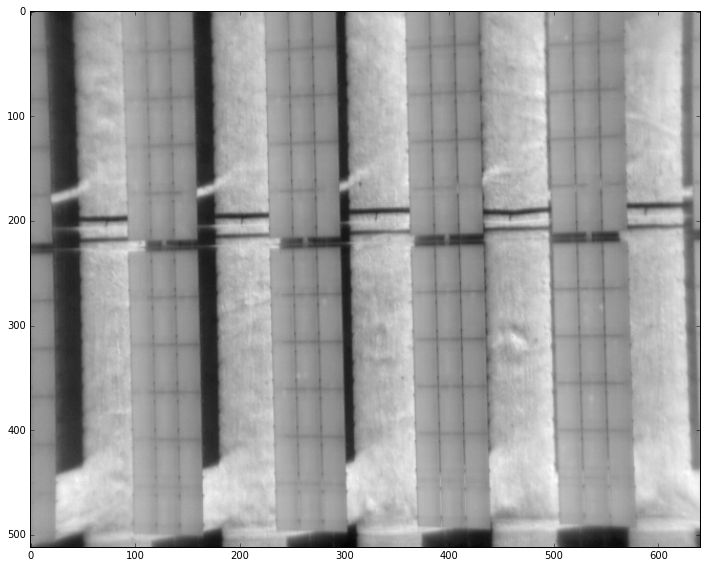

In [266]:
print ITERM.min()
print ITERM.max()

pl.figure(figsize=(12,12))
pl.imshow(ITERM, cmap='gray')
pl.show()

3 36


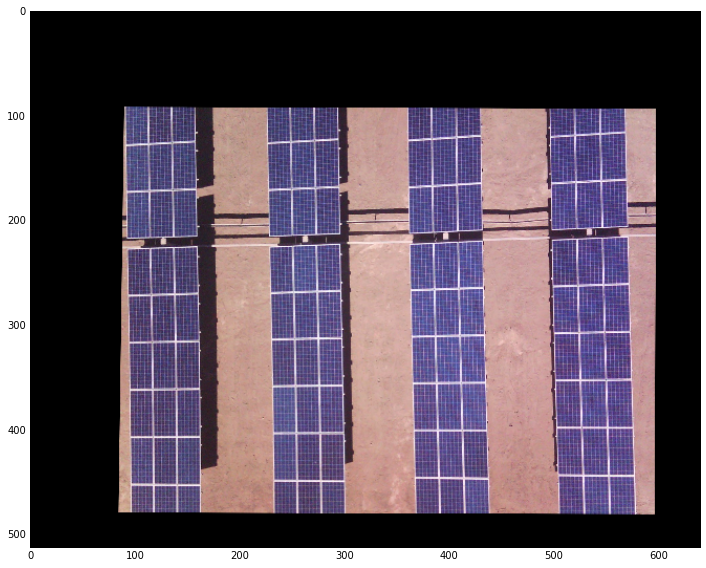

In [267]:
ERGB = cv2.Canny(I2, 250, 350)
ERGB[np.where(cv2.dilate((I2[:,:,0]==0).astype(np.uint8)*255, np.ones((10,10))))] = 0
ERGB = ERGB[80:-80, 80:-80]

# pl.figure(figsize=(12,12))
# pl.imshow(ERGB)
# pl.show()

ETERM = cv2.Canny(ITERM, 10, 140)
#ETERM[np.where(cv2.dilate((I2[:,:,0]==0).astype(np.uint8)*255, np.ones((10,10))))] = 0

# pl.figure(figsize=(12,12))
# pl.imshow(ETERM)
# pl.show()

res = cv2.matchTemplate(ERGB, ETERM, cv2.TM_CCOEFF_NORMED)

# pl.figure(figsize=(12,12))
# pl.imshow(res)
# pl.show()

a = res.argmax()

xd = a%res.shape[0] - 80
yd = a//res.shape[0] - 80

print xd, yd

H2 = np.array([[1,0,xd],[0,1,yd],[0,0,1]]).astype(np.float)
I3 = cv2.warpPerspective(I2, H2, (I2.shape[1], I2.shape[0]), flags=cv2.INTER_AREA)

pl.figure(figsize=(12,12))
pl.imshow(I3)
pl.show()

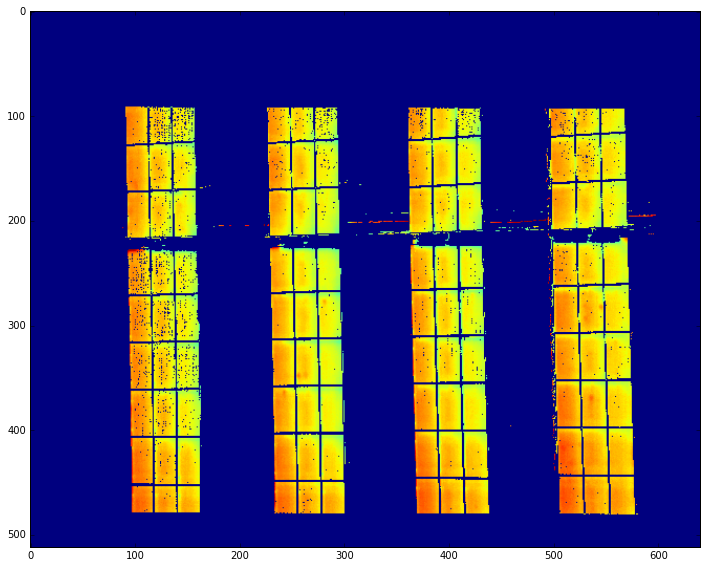

In [268]:
I2LAB = cv2.cvtColor(I3, cv2.COLOR_RGB2LAB)
#I2LAB = I3

IMASK = (I2LAB[:,:,2]<128) * (I2LAB[:,:,0]>60) * (I2LAB[:,:,0]<160) * (ITERM > 100)

pl.figure(figsize=(12,12))
pl.imshow(IMASK*ITERM)
pl.show()
